<a href="https://colab.research.google.com/github/Giuseppe31-s/Desafio-Cientista-de-Dados-oncase/blob/main/Desafio_oncase_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

1. métricas: precision, recall e F1-score;

2. dados: classification_data.zip

In [ ]:
!unzip /content/classification_data.zip

Archive:  /content/classification_data.zip
replace classification_data/classification_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace classification_data/classification_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/classification_data/classification_train.csv')

Nenhum valor faltante no nosso dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [ ]:
df_train

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1
...,...,...,...
665,0.690181,-0.800060,1
666,1.043712,-0.212964,1
667,1.821542,-0.406377,1
668,0.031938,1.424103,0


# Estatística descritiva

Atráves do resumo estatístico da para perceber que não há outlier.

In [ ]:
df_train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


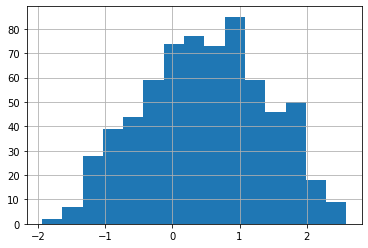

In [ ]:
df_train['x1'].hist(bins = 15);

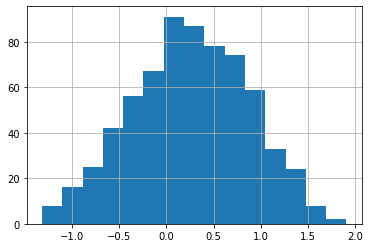

In [ ]:
df_train['x2'].hist(bins = 15);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


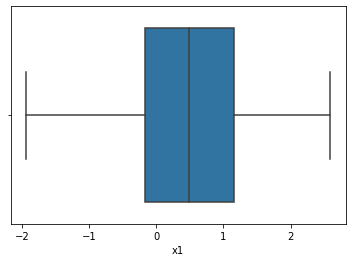

In [ ]:
sns.boxplot(df_train['x1']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


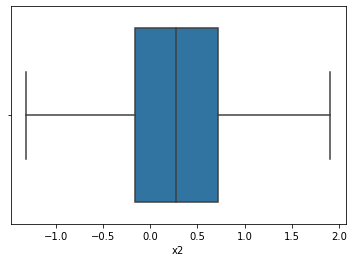

In [ ]:
sns.boxplot(df_train['x2']);

Nossa variável dependente está balançeada, não vai ser preciso balancear a nossa amostra.

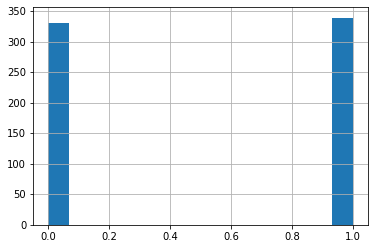

In [ ]:
df_train['target'].hist(bins = 15);

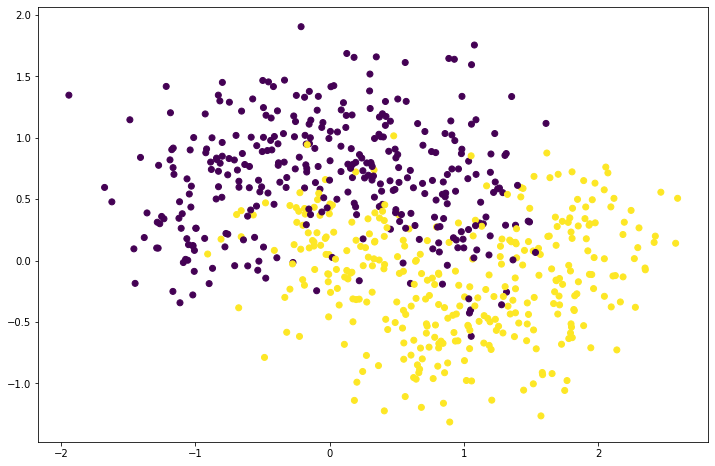

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(df_train['x1'], df_train['x2'], c=df_train['target']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


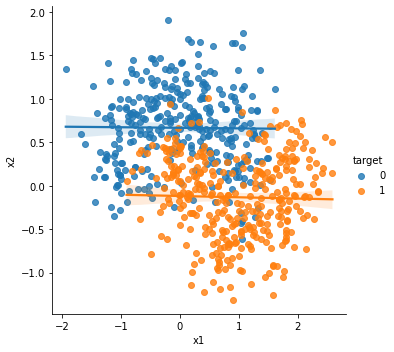

In [ ]:
sns.lmplot('x1', 'x2', hue='target', data = df_train)

Como as nossas variáveis não seguem uma relação linear, vamos usar a **correlação de spearman**.



In [ ]:
corr = df_train.corr(method = 'spearman')
corr

,x1,x2,target
x1,1.000000,-0.367749,0.492271
x2,-0.367749,1.000000,-0.664679
target,0.492271,-0.664679,1.000000


As nossas variáveis não são correlacionadas entre si, isso é um ponto positivo, pois evita a multicolinearidade.

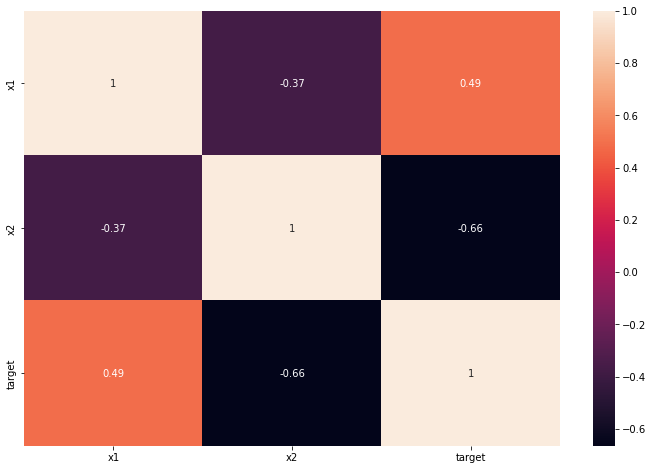

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True);

# Modelos

Como os nossos dados estão sem rótulos, fica muito difícil supor se eles são independentes ou não. Vou usar alguns modelos que lida com as instâncias de maneira independente e outros que lidam com a instância de maneira dependente.


Modelos que podem funcionar bem:

1.    Árvores de decisão - Árvores de decisão podem ser um modelo poderoso para classificação binária e são capazes de capturar relacionamentos não lineares entre recursos. Elas podem ser particularmente úteis para conjuntos de dados com muita sobreposição entre as classes.

2.    K-Nearest Neighbors (K-NN) - K-NN é um algoritmo de classificação simples que pode ser eficaz em conjuntos de dados com grande sobreposição entre as classes. É um modelo bem complexo, que fica muito lento dependendo das instâncias, porém nosso dataset é bem simples e enxuto.

3. Regressão Lógistica - A regressão lógistica é um modelo simples e poderoso que é comumente usando para estimar a probabilidade de uma instância pertencer a uma class especifica.


Modelos que podem não ser apropriados:

1.    SVM - O SVM pode não ser um bom modelo para conjuntos de dados com grande sobreposição entre as classes, mesmo com o uso de classificação de margem suave.

2.    Naive Bayes - O modelo Naive Bayes pressupõe independência entre recursos, o que pode não ser verdadeiro para o nosso conjuntos de dados, e pode não ser eficaz para conjuntos de dados com grande sobreposição entre as classes.

In [ ]:
X = df_train.drop(columns = 'target').values


In [ ]:
y = df_train['target'].values

## Pré-processamento


**Normalização**

É necessário para padronizar o valor das *features* quando elas estão em intervalos muito variados (por exemplo, idade e salário têm ordens de grandeza diferentes). Mantendo todas as *features* em intervalos de valores similares, a convergência dos modelos é acelerada e, em alguns casos, o desempenho final é melhorado.

As duas principais formas de se normalizar os dados são:

Min max scaling

$
\begin{align}
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
\end{align}
$


Standard scaling

$
\begin{align}
x_{scaled} = \frac{x - \mu}{\sigma}
\end{align}
$
  
Note que a normalização é feita para cada uma das *features*, ou seja, para cada coluna do vetor de *features* $X$.


**Padronização**

A padronização é uma técnica comum de pré-processamento de dados em Machine Learning, que é útil quando os dados seguem uma distribuição normal ou aproximadamente normal. A padronização ajuda a remover a média e escala dos dados, para que a distribuição dos dados tenha uma média de zero e desvio padrão de um. Isso torna mais fácil para o modelo entender o impacto relativo de cada recurso no resultado final e, em alguns casos, pode melhorar a precisão do modelo.

As duas principais formas de padronizar os dados são:

1.    Standard scaling: nessa técnica, cada valor é transformado pela subtração da média e, em seguida, dividido pelo desvio padrão. Isso garante que a distribuição dos dados tenha uma média de zero e um desvio padrão de um.

$$x_{scaled} = \frac{x - \mu}{\sigma}$$

2.    Mean normalization: essa técnica transforma cada valor pela subtração da média e, em seguida, divide pelo intervalo máximo e mínimo. Isso garante que a distribuição dos dados esteja centrada na média e tenha uma amplitude de 1.

$$x_{scaled} = \frac{x - \mu}{x_{max} - x_{min}}$$

Note que a padronização é feita para cada uma das features, ou seja, para cada coluna do vetor de features $X$. Manter todas as features em uma escala similar pode acelerar a convergência do modelo e, em alguns casos, pode melhorar o desempenho final do modelo.


Vamos utilizar o Standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
X_scaler = scaler.transform(X)

# Regressão Logística

Muitos não sabem mas a função LogisticRegression já vem com um gradiente descendente embutido, por esse motivo podemos utilizar o max_inter que é o máximo de interações que o gradiente descendente vai fazer dentro da função custo da nossa regressão logística.

Algoritmo em linha gerais:
* Seja J(w) a função custo a ser minimizada
* Chutar um valor para w
* Calcular o gradiente de J no ponto w (“direção de maior inclinação”)
* Alterar w no sentido oposto ao do vetor gradiente
* Repetir até atingir algum critério de convergência ou número de
iterações

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter= 1500, random_state = 42)

## k-Fold Cross Validation

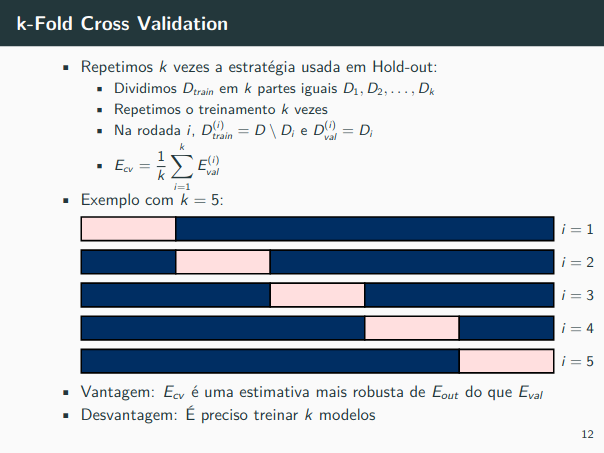

In [ ]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f"Accuracy com cross validation = [{(media - 2 * desvio_padrao)*100:.2f}%, {(media + 2 * desvio_padrao)*100:.2f}%]")


In [ ]:


from sklearn.model_selection import cross_validate

eout = cross_validate(logit, X, y, cv=5, scoring="accuracy")

eout



{'fit_time': array([0.00421333, 0.00297546, 0.0029726 , 0.00308943, 0.00381517]),
 'score_time': array([0.00034285, 0.00030589, 0.00033927, 0.00029159, 0.00044227]),
 'test_score': array([0.82089552, 0.90298507, 0.76865672, 0.85820896, 0.85074627])}

In [ ]:
print('Regressão Logística')
imprime_resultados(eout)

Regressão Logística
Accuracy com cross validation = [75.14%, 92.92%]


# Cross_val_predict

Mesmo conceito k-Fold Cross Validation, porém agora apenas tratando as previsões.

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(logit, X, y, cv=5)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y, y_train_pred)

array([[279,  52],
       [ 55, 284]])

# Matriz de confusão

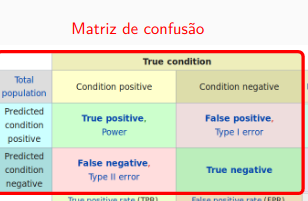

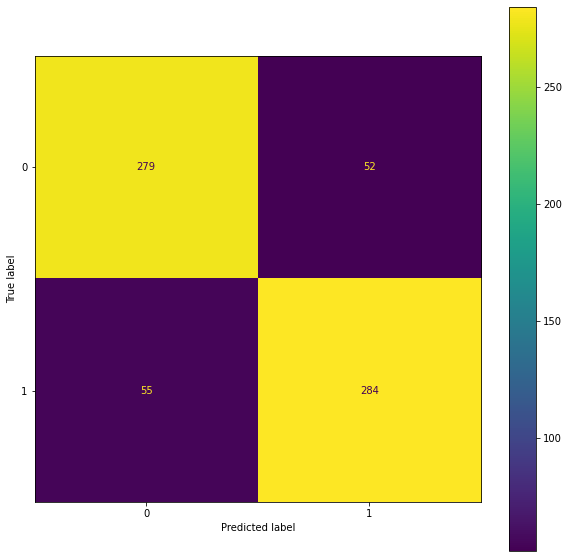

In [ ]:
cm = confusion_matrix(y, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

Métricas para avaliar o modelo:

> Precisão

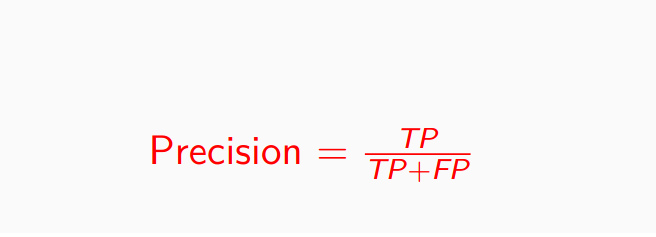

> Revocação

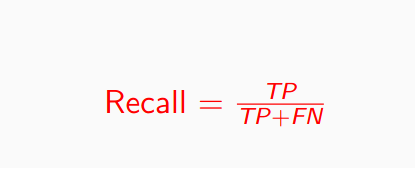

> F1-Score

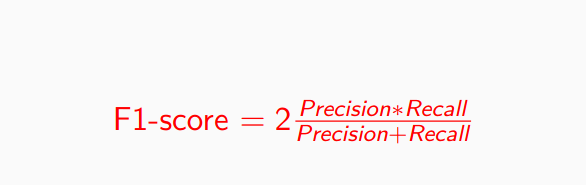

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Avaliação modelo

Esse modelo teve um desepenho bastante positivo, vamos usar ele como base para os outros, pois computacionalmente ele é menos complexo.

In [ ]:
print('f1_score')
print(round(f1_score(y, y_train_pred),2))
print('precision_score')
print(round(precision_score(y, y_train_pred),2))
print('recall_score')
print(round(recall_score(y, y_train_pred),2))
print('accuracy_score')
print(round(accuracy_score(y, y_train_pred),2))

f1_score
0.84
precision_score
0.85
recall_score
0.84
accuracy_score
0.84


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, y_train_pred)

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

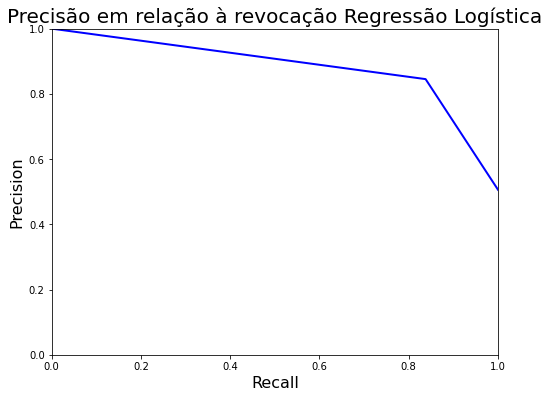

In [ ]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title('Precisão em relação à revocação Regressão Logística', fontsize = 20)
plt.show()


## Curva ROC

A curva ROC (Receiver Operating Characteristic) é um gráfico que mostra o desempenho de um modelo de classificação binária em diferentes níveis de limiar. É criada traçando a taxa de verdadeiros positivos (TPR) em função da taxa de falsos positivos (FPR) para todos os possíveis valores de limiar de classificação.

Aurélien Géron, no seu livro "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow", explica que a curva ROC é útil porque permite comparar diferentes modelos e escolher o que apresenta o melhor desempenho. Um modelo é considerado melhor se a sua curva ROC estiver mais próxima do canto superior esquerdo do gráfico, que representa uma taxa elevada de TPR e uma baixa taxa de FPR

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_train_pred)


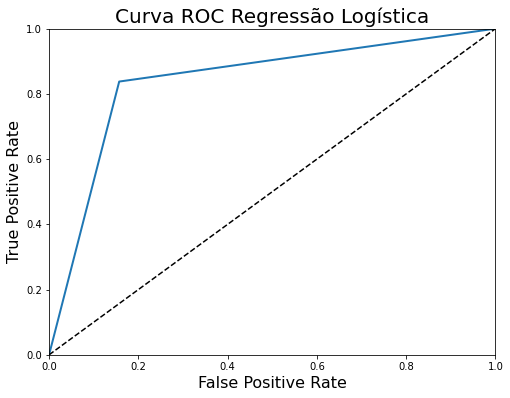

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title('Curva ROC Regressão Logística', fontsize = 20 )
plt.show()


# Árvores de decisão

É preciso tomar bastante cuidado com as árvores de decisão, pois esse modelo tem uma capacidade muito alta de se sobreajustar.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier(min_samples_leaf=4, random_state = 42,max_depth=2)

In [ ]:


eout = cross_validate(DTC, X, y, cv=5, scoring="accuracy")

Aparentemente, o nosso modelo de árvore de decisão ficou melhor.

In [ ]:
print('Regressão Árvores de decisão')
imprime_resultados(eout)

Regressão Árvores de decisão
Accuracy com cross validation = [80.96%, 91.58%]


## Matriz de confusão e medidas

In [ ]:
y_train_pred = cross_val_predict(DTC, X, y, cv=5)

In [ ]:

confusion_matrix(y, y_train_pred)

array([[258,  73],
       [ 19, 320]])

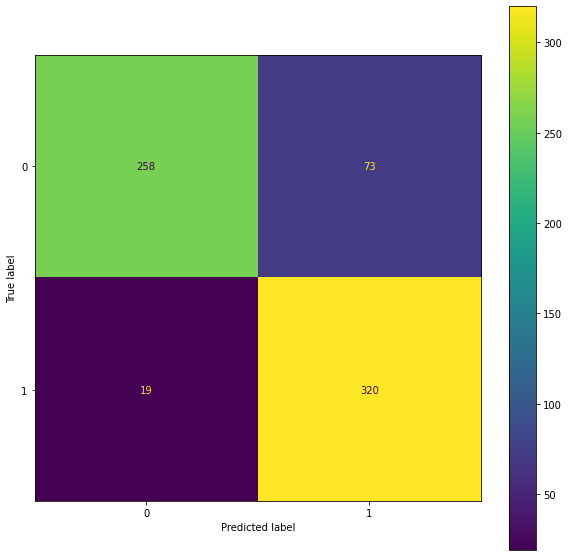

In [ ]:
cm = confusion_matrix(y, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

## Avaliação

Nosso modelo acabou ficando um pouco pior em relação a regressão logística.

In [ ]:
print('f1_score')
print(round(f1_score(y, y_train_pred),2))
print('precision_score')
print(round(precision_score(y, y_train_pred),2))
print('recall_score')
print(round(recall_score(y, y_train_pred),2))
print('accuracy_score')
print(round(accuracy_score(y, y_train_pred),2))

f1_score
0.87
precision_score
0.81
recall_score
0.94
accuracy_score
0.86


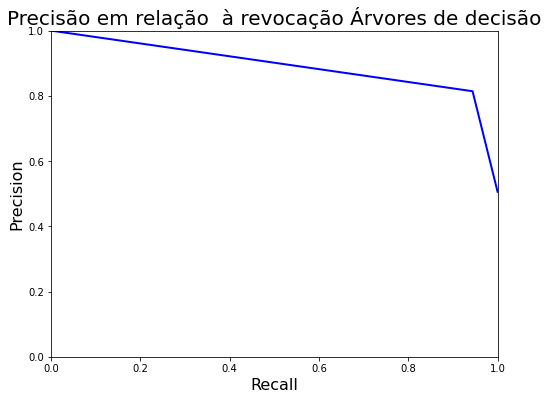

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y, y_train_pred)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title('Precisão em relação  à revocação Árvores de decisão', fontsize = 20)
plt.show()


## Curva ROC

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_train_pred)

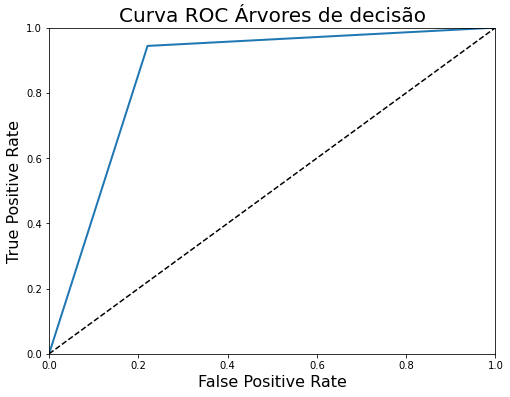

In [ ]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title('Curva ROC Árvores de decisão', fontsize = 20 )
plt.show()

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
K_NN = KNeighborsClassifier()

In [ ]:
eout = cross_validate(K_NN, X, y, cv=5, scoring="accuracy")

In [ ]:
print('K-Nearest Neighbors')
imprime_resultados(eout)

K-Nearest Neighbors
Accuracy com cross validation = [82.59%, 93.83%]


In [ ]:
y_train_pred = cross_val_predict(K_NN, X, y, cv=5)

In [ ]:
confusion_matrix(y, y_train_pred)

array([[289,  42],
       [ 37, 302]])

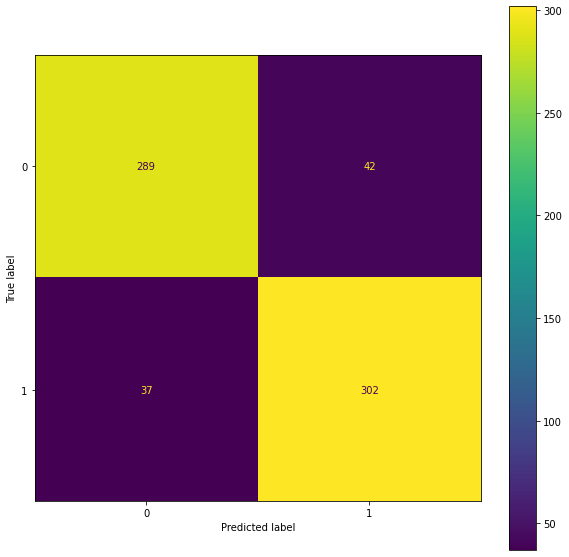

In [ ]:
cm = confusion_matrix(y, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

## Avaliação

O modelo K-NN ficou superior aos demais.

In [ ]:
print('f1_score')
print(round(f1_score(y, y_train_pred),2))
print('precision_score')
print(round(precision_score(y, y_train_pred),2))
print('recall_score')
print(round(recall_score(y, y_train_pred),2))
print('accuracy_score')
print(round(accuracy_score(y, y_train_pred),2))

f1_score
0.88
precision_score
0.88
recall_score
0.89
accuracy_score
0.88


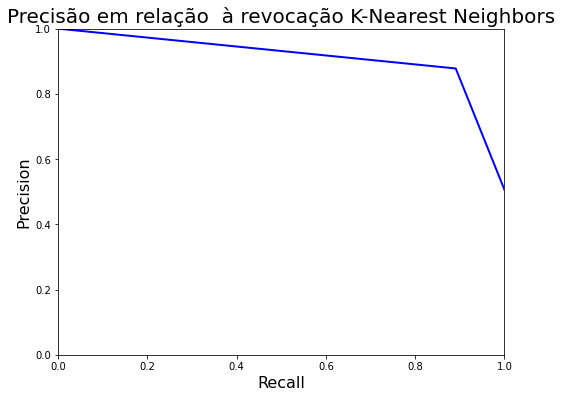

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y, y_train_pred)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title('Precisão em relação  à revocação K-Nearest Neighbors', fontsize = 20)
plt.show()


# Curva ROC

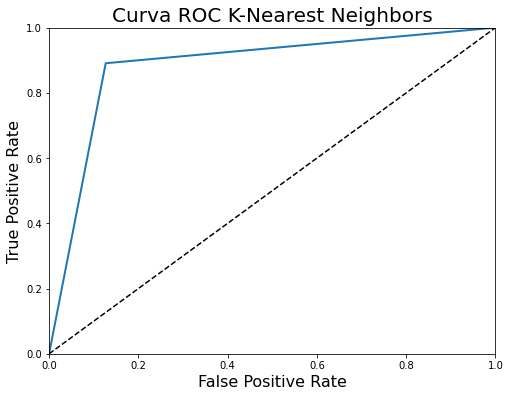

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_train_pred)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title('Curva ROC K-Nearest Neighbors', fontsize = 20 )
plt.show()

# Escolhendo o modelo

Como não sei a finalidade do modelo, vou escolher aquele que em geral se saiu melhor em todas as tarefas o **K-NN**.

Porém, é preciso levar em consideração que a árvore de decisão tem um recall bastante elevado, caso a tarefa fosse, por exemplo, classificar ladrões de lojas, esse modelo seria escolhido, pois o recall seria muito mais importante que a precisão.

# O nosso melhor modelo é o K-NN

Vamos visualizar a fronteira de decisão.

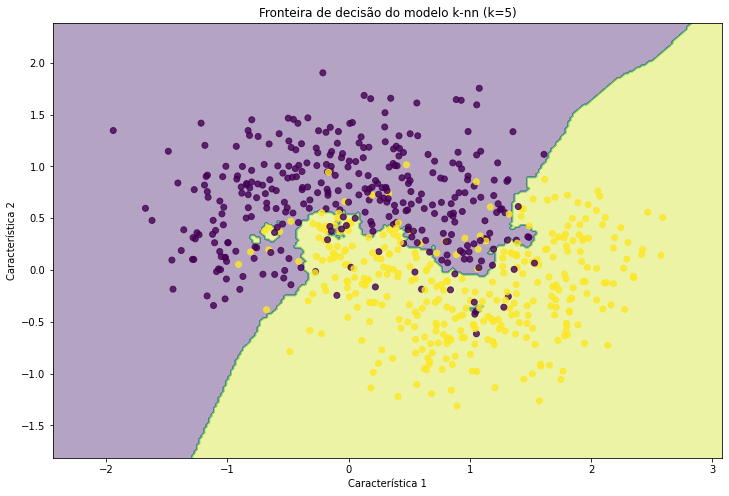

In [ ]:
K_NN.fit(X,y)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Fazendo a classificação de cada ponto da grade usando o modelo k-nn
Z = K_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando os pontos de dados e a fronteira de decisão
plt.figure(figsize = (12,8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Fronteira de decisão do modelo k-nn (k=5)')
plt.show()

# Vamos tunnar os hiperparâmetros do nosso modelo K-NN

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define um pipeline que inclui um escalonador e o classificador k-nn
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define uma grade de hiperparâmetros para o ajuste do modelo k-nn
params = {
    'knn__n_neighbors': [2,3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__leaf_size': [30,60,90,120],
    'knn__p': [1,2,3,4,5,6,7,8]
}

# Cria um objeto GridSearchCV para fazer a busca de hiperparâmetros
grid_search = GridSearchCV(knn_pipe, params, cv=3, verbose=1)

# Ajusta o modelo k-nn aos dados de treinamento
grid_search.fit(X_train, y_train)

# Avalia o desempenho do modelo ajustado nos dados de teste
score = grid_search.score(X_test, y_test)

# Imprime o melhor conjunto de hiperparâmetros encontrado e a acurácia correspondente
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Acurácia:", score)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Melhores hiperparâmetros: {'knn__leaf_size': 30, 'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}
Acurácia: 0.8955223880597015


In [ ]:
best_model = grid_search.best_estimator_

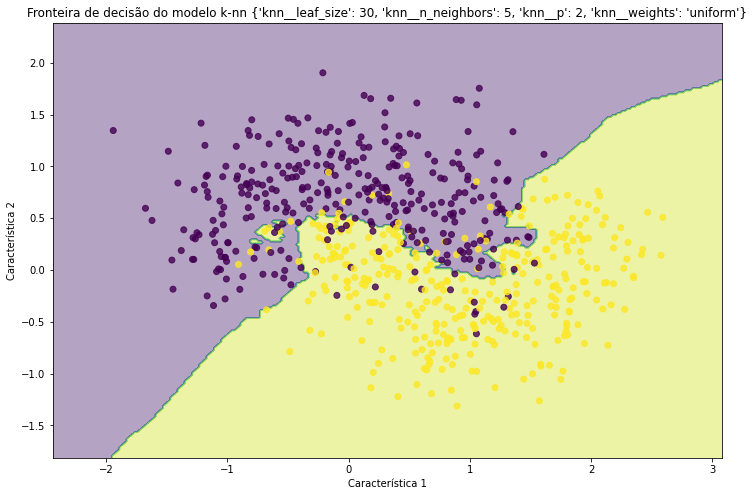

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Fazendo a classificação de cada ponto da grade usando o modelo k-nn
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando os pontos de dados e a fronteira de decisão
plt.figure(figsize = (12,8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title(f'Fronteira de decisão do modelo k-nn {grid_search.best_params_}')
plt.show()

O melhor modelo acabou sendo o padrão mesmo.

# DADOS DE TESTE

Agora vamos utilizar em prática o nosso modelo e vamos verificar se ele se sai bem com dados que nunca viu.

In [ ]:
df_test = pd.read_csv('/content/classification_data/classification_test.csv')

In [ ]:
X_test = df_test.drop(columns = 'target').values
y_test = df_test['target'].values


In [ ]:
best_model

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
predict = best_model.predict(X_test)

#Avaliando o nosso modelo com os dados de teste.

Nosso modelo em geral teve um ótimo desempenho e estaria pronto para entrar em produção dependendo do objetivo dele.

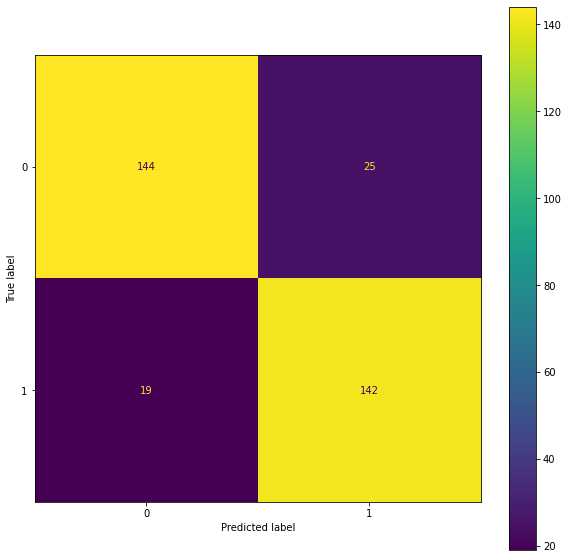

In [ ]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [ ]:
print('f1_score')
print(round(f1_score(y_test, predict),2))
print('precision_score')
print(round(precision_score(y_test, predict),2))
print('recall_score')
print(round(recall_score(y_test, predict),2))
print('accuracy_score')
print(round(accuracy_score(y_test, predict),2))

f1_score
0.87
precision_score
0.85
recall_score
0.88
accuracy_score
0.87


# Considerações finais

Poderia ter utilizado modelos mais complexos, como modelos de redes neurais e criar features para tentar em N dimensões separar os dados com alguma combinação matemática. Sem um objetivo claro do modelo, fica um pouco nebuloso esse feature engineering.